In [1]:
import tdm_loader
from datetime import datetime
import re
import pandas as pd
import xmltodict, json
import numpy as np
import os
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_theme()

In [2]:
base_dir = '/home/kasper/Dropbox/George Maria/PTRMS 24-26NOV2020/'
file_name = '24nov2020.tdm'
mz_label = 'm/z 95.00 ch29'
file_summary_name ='24nov2020_Summary.txt'

In [3]:
with open(base_dir+file_name) as xml_file:
    data_dict = xmltodict.parse(xml_file.read())

with open(base_dir+"{0}.json".format(file_name), "w") as json_file: 
    json.dump(data_dict, json_file) 

In [4]:
data_file = tdm_loader.OpenFile(base_dir+file_name)

In [ ]:
# for channel in range(1,data_file.no_channel_groups()+1):


In [18]:
data_file.no_channel_groups()

6

In [22]:
m_z_data = data_file.channel_dict(2)[mz_label]

nrows = m_z_data.shape[0]

{'m/z 21.00 ch0': array([13169.9765625 , 13509.97460938, 13759.97753906, ...,
         7879.98828125,  7529.98779297,  7839.98730469]),
 'm/z 25.00 ch1': array([ 8.49958706,  6.99977207,  5.99974489, ...,  5.49978352,
        10.49957943,  6.99976778]),
 'm/z 30.00 ch2': array([6799.99853516, 8199.99804688, 7099.99853516, ..., 4899.99853516,
        4399.99853516, 3999.99902344]),
 'm/z 32.00 ch4': array([210599.953125 , 203399.96875  , 198999.96875  , ...,
         85699.984375 ,  90799.9765625,  87799.984375 ]),
 'm/z 33.00 ch5': array([1949.99902344, 1799.99914551, 1799.9987793 , ...,  849.99969482,
         999.99969482,  599.99975586]),
 'm/z 37.00 ch6': array([105699.9765625 , 103299.984375  , 109899.9765625 , ...,
         53599.984375  ,  52199.9921875 ,  53599.98828125]),
 'm/z 42.00 ch7': array([59.99978638, 49.99976349, 44.99981689, ..., 29.9998951 ,
        19.99990273, 34.99981308]),
 'm/z 43.00 ch8': array([499.99969482, 949.99957275, 749.99957275, ..., 399.99978638,
    

In [6]:
summary=open(base_dir+file_summary_name, "r")

times = [t for t in summary.readlines() if 'Start Time' in t or 'Stop Time' in t]

<AxesSubplot:xlabel='Relative Time'>

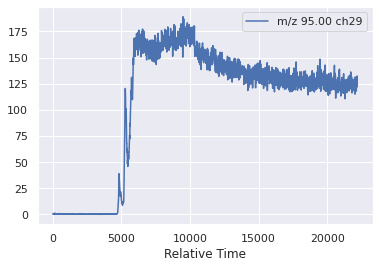

In [12]:
start_time_m = times[0]
stop_time_m = times[1]

start_time_m1 = re.sub('[^A-Za-z0-9]+', ' ', start_time_m).split(' ')[-7:-1]
stop_time_m1 = re.sub('[^A-Za-z0-9]+', ' ', stop_time_m).split(' ')[-7:-1]


start_datetime_string = ' '.join(start_time_m1)
stop_datetime_string = ' '.join(stop_time_m1)

start_datetime_datetime = datetime.strptime(start_datetime_string, '%B %d %Y %H %M %S')
stop_datetime_datetime = datetime.strptime(stop_datetime_string, '%B %d %Y %H %M %S')


with open(base_dir+"{0}.json".format(file_name), "r") as json_file: 
    data = json.load(json_file) 

tdm_channel_list = data['usi:tdm']['usi:data']['tdm_channel']

relative_time_dict = [td for td in tdm_channel_list if td['name']=='Relative Time'][0]

absolute_time_dict = [td for td in tdm_channel_list if td['name']=='Absolute Time'][0]

relative_time_minimum = float(relative_time_dict['minimum'])
relative_time_maximum = float(relative_time_dict['maximum'])


time_step = round((stop_datetime_datetime-start_datetime_datetime).seconds/nrows, 3)

timesteps = np.linspace(relative_time_minimum, relative_time_maximum, num=nrows).round(3)

index = pd.Index(timesteps, name='Relative Time')

data_mz = pd.DataFrame(m_z_data, index=index, columns=[mz_label])
data_mz.plot()

In [16]:
for column in data_mz.columns:
    print(column)
    data_mz[column].plot()
    plt.ylabel(column)
    plt.xticks(rotation=70);
    plt.tight_layout()
    os.makedirs(base_dir+'{0}'.format(file_name.split('.')[0]), exist_ok=True)
    plt.savefig(base_dir+'{0}/{1}.svg'.format(file_name.split('.')[0], column.replace('/','_')), format='svg', dpi=1200)
    plt.close()

m/z 95.00 ch29
